# Problem 8: 
#Apply random iteration algorithm and compute images associated with the IFS code given in Table below. Run your program and obtain softcopy of the output (the probabilities given in the last column play an important role in the computation of images of the attractor).

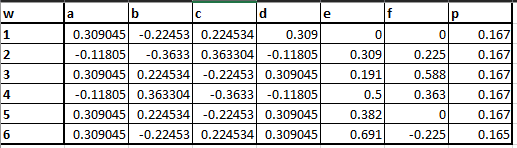

In [4]:
# IFS fractals using iteration method
# FB - 20120107
import random
from collections import deque
from PIL import Image
# image size
imgx = 512
imgy = 512 # will be auto-re-adjusted according to aspect ratio of the fractal

# Fractint IFS Fern
mat=[[0.309045,-0.224534,0.224534,0.309000,0.0000,0.0000,0.167],
     [-0.118045,-0.363304,0.363304,-0.118045,0.3090,0.2250,0.167],
     [0.309045,0.224534,-0.224534,0.309045,0.1910,0.5880,0.167],
     [-0.118045,0.363304,-0.363304,-0.118045,0.5000,0.3630,0.167],
     [0.309045,0.224534,-0.224534,0.309045,0.3820,0.0000,0.167],
     [0.309045,-0.224534,0.224534,0.309045,0.6910,-0.2250,0.165]]

### Fractint IFS Dragon
#mat = [[0.824074, 0.281482, -0.212346,  0.864198, -1.882290, -0.110607, 0.787473],
 #      [0.088272, 0.520988, -0.463889, -0.377778,  0.785360,  8.095795, 0.212527]]

### C fractal
##mat = [[0.5, -0.5, 0.5, 0.5, 0.0, 0.0, 0.5],
##       [0.5, 0.5, -0.5, 0.5, 0.5, 0.5, 0.5]]

### Dragon
##mat = [[0.5, -0.5, 0.5, 0.5, 0.0, 0.0, 0.5],
##       [-0.5, -0.5, 0.5, -0.5, 1.0, 0.0, 0.5]]

m = len(mat) # number of IFS transformations
# find xmin, xmax, ymin, ymax of the fractal using IFS algorithm
x = mat[0][4]
y = mat[0][5] 
xa = x
xb = x
ya = y
yb = y
for k in range(imgx * imgy):
    p = random.random()
    psum = 0.0
    for i in range(m):
        psum += mat[i][6]
        if p <= psum:
            break
    x0 = x * mat[i][0] + y * mat[i][1] + mat[i][4] 
    y  = x * mat[i][2] + y * mat[i][3] + mat[i][5] 
    x = x0 
    if x < xa:
        xa = x
    if x > xb:
        xb = x
    if y < ya:
        ya = y
    if y > yb:
        yb = y

imgy = int(imgy * (yb - ya) / (xb - xa)) # auto-re-adjust the aspect ratio 
image = Image.new("RGB", (imgx, imgy))

# drawing using IFS algorithm
##x=0.0
##y=0.0 
##for k in range(imgx * imgy):
##    p=random.random()
##    psum = 0.0
##    for i in range(m):
##        psum += mat[i][6]
##        if p <= psum:
##            break
##    x0 = x * mat[i][0] + y * mat[i][1] + mat[i][4] 
##    y  = x * mat[i][2] + y * mat[i][3] + mat[i][5] 
##    x = x0 
##    jx = int((x - xa) / (xb - xa) * (imgx - 1)) 
##    jy = (imgy - 1) - int((y - ya) / (yb - ya) * (imgy - 1))
##    image.putpixel((jx, jy), (255, 255, 255)) 

# drawing using iteration method
maxIt = 16 # max number of iterations allowed
for ky in range(imgy):
    for kx in range(imgx):
        x = float(kx) / (imgx - 1) * (xb - xa) + xa
        y = float(ky) / (imgy - 1) * (yb - ya) + ya
        queue = deque([])
        queue.append((x, y, 0))
        while len(queue) > 0: # iterate points until none left
            (x, y, i) = queue.popleft()
            # apply all (inverse) IFS transformations
            for j in range(m):
                d = mat[j][0] * mat[j][3] - mat[j][2] * mat[j][1]
                if d != 0.0:
                    xnew = ((x - mat[j][4]) * mat[j][3] - (y - mat[j][5]) * mat[j][1]) / d
                    ynew = ((y - mat[j][5]) * mat[j][0] - (x - mat[j][4]) * mat[j][2]) / d
                    if xnew >= xa and xnew <= xb and ynew >= ya and ynew <= yb:
                        if i + 1 == maxIt: break
                        queue.append((xnew, ynew, i + 1))

        image.putpixel((kx, ky), (i % 8 * 32, i % 16 * 16, i % 32 * 8))
    print("iteration:"+str(ky))
image.save("IFSfractalUsingIterationMethod.png", "PNG")

iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
iteration:5
iteration:6
iteration:7
iteration:8
iteration:9
iteration:10
iteration:11
iteration:12
iteration:13
iteration:14
iteration:15
iteration:16
iteration:17
iteration:18
iteration:19
iteration:20
iteration:21
iteration:22
iteration:23
iteration:24
iteration:25
iteration:26
iteration:27
iteration:28
iteration:29
iteration:30
iteration:31
iteration:32
iteration:33
iteration:34
iteration:35
iteration:36
iteration:37
iteration:38
iteration:39
iteration:40
iteration:41
iteration:42
iteration:43
iteration:44
iteration:45
iteration:46
iteration:47
iteration:48
iteration:49
iteration:50
iteration:51
iteration:52
iteration:53
iteration:54
iteration:55
iteration:56
iteration:57
iteration:58
iteration:59
iteration:60
iteration:61
iteration:62
iteration:63
iteration:64
iteration:65
iteration:66
iteration:67
iteration:68
iteration:69
iteration:70
iteration:71
iteration:72
iteration:73
iteration:74
iteration:75
iteration:76
iteration

#Problem 4

# Apply Chaos Game algorithm and compute images associated with the IFS code given in Table below. Run your program and obtain softcopy of the output.

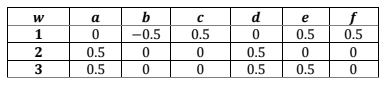


In [8]:
import random
from PIL import Image
imgx = 512
imgy =512
maxIt = imgx * imgy * 2

fractalName = "Random"
mat=[[0,-0.5,0.5,0,0.5,0.5],
     [0.5,0,0,0.5,0,0],
     [0.5,0,0,0.5,0.5,0]]


def PolygonArea(corners):
    n = len(corners) # of corners
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area

def IFS(x, y, i): # apply ith transformation to given point
    x0 = x * mat[i][0] + y * mat[i][1] + mat[i][4] 
    y  = x * mat[i][2] + y * mat[i][3] + mat[i][5] 
    x = x0
    return (x, y)

m = len(mat) # number of IFS transformations

# calculate probabilities of the transformations
areas = [] # areas of transformed rectangles
for j in range(m):
    area = PolygonArea([IFS(1, 1, j), IFS(-1, 1, j), IFS(-1, -1, j), IFS(1, -1, j)])
    areas.append(area)
totalArea = sum(areas)
pArr = []
for j in range(m):
    pArr.append(areas[j] / totalArea)
     
# find bounding rectangle of the fractal using Chaos Game algorithm
x = mat[0][4]
y = mat[0][5] 
xa = x
xb = x
ya = y
yb = y
for k in range(maxIt):
    i = random.randint(0, m - 1)
    if random.random() <= pArr[i]:
        (x, y) = IFS(x, y, i)
        if x < xa:
            xa = x
        if x > xb:
            xb = x
        if y < ya:
            ya = y
        if y > yb:
            yb = y

imgy = int(imgy * (yb - ya) / (xb - xa)) # re-adjust the aspect ratio 
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()

# drawing using Chaos Game algorithm
theColor = (255, 255, 255)
x=0.0
y=0.0 
for k in range(maxIt):
    i = random.randint(0, m - 1)
    if random.random() <= pArr[i]:
        (x, y) = IFS(x, y, i)
        jx = int((x - xa) / (xb - xa) * (imgx - 1)) 
        jy = (imgy - 1) - int((y - ya) / (yb - ya) * (imgy - 1))
        if jx >= 0 and jx < imgx and jy >= 0 and jy < imgy:
            pixels[jx, jy] = theColor
    print("iteration:"+str(k))
    
image.save(fractalName + " fractal.png", "PNG")

Streaming output truncated to the last 5000 lines.
iteration:519288
iteration:519289
iteration:519290
iteration:519291
iteration:519292
iteration:519293
iteration:519294
iteration:519295
iteration:519296
iteration:519297
iteration:519298
iteration:519299
iteration:519300
iteration:519301
iteration:519302
iteration:519303
iteration:519304
iteration:519305
iteration:519306
iteration:519307
iteration:519308
iteration:519309
iteration:519310
iteration:519311
iteration:519312
iteration:519313
iteration:519314
iteration:519315
iteration:519316
iteration:519317
iteration:519318
iteration:519319
iteration:519320
iteration:519321
iteration:519322
iteration:519323
iteration:519324
iteration:519325
iteration:519326
iteration:519327
iteration:519328
iteration:519329
iteration:519330
iteration:519331
iteration:519332
iteration:519333
iteration:519334
iteration:519335
iteration:519336
iteration:519337
iteration:519338
iteration:519339
iteration:519340
iteration:519341
iteration:519342
iteration:5193